In [118]:
# To supress Warning messages
import warnings 
warnings.filterwarnings('ignore')

# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [119]:
#Import numpy, Pandas and matplotlib modules
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
#load the input csv file into a  DataFrame
iris = pd.read_csv('iris.csv')

In [121]:
#Check if the DataFrame is loaded correctly using head()
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [122]:
#Check if the DataFrame is loaded correctly using sample()
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
148,149,6.2,3.4,5.4,2.3,Iris-virginica
16,17,5.4,3.9,1.3,0.4,Iris-setosa
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
114,115,5.8,2.8,5.1,2.4,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa


## Data Pre-processing

### Question 2 - Check if there are any missing values



In [236]:
#Using isna function to check nan values
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [124]:
#Using fillna to fill null values with 0
iris.fillna(value=0, inplace=True)

In [125]:
#Using isna function to re-check if nan values are present
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [237]:
#Check Datatypes
iris.dtypes

SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [238]:
#import preprpcessing module from sklearn
from sklearn import preprocessing

In [239]:
#Using LabelEncoder module to change to caregorical values
le = preprocessing.LabelEncoder()

In [240]:
#Using fit() method to change all the classes to numericals
le.fit(iris['Species'])

LabelEncoder()

In [241]:
#Check the categorical values
le.classes_

array([0, 1, 2], dtype=int64)

In [242]:
#Assign the changed categorical values 0,1, 2 to the Dataframe
iris['Species'] = le.transform(iris['Species'])

In [243]:
#Check the categorical values
le.classes_

array([0, 1, 2], dtype=int64)

In [245]:
#Check for unique values in species column
iris['Species'].unique()

array([0, 1, 2], dtype=int64)

In [246]:
#Check Datatypes
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [136]:
#Check the Datframe values using head
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [247]:
#Check the Datframe values using sample()
iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
23,5.1,3.3,1.7,0.5,0
66,5.6,3.0,4.5,1.5,1
73,6.1,2.8,4.7,1.2,1
146,6.3,2.5,5.0,1.9,2
144,6.7,3.3,5.7,2.5,2


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [248]:
#Find correlation of each independent variable with target variable
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,0.145802,0.816560,0.668652,0.622970
SepalWidthCm,0.145802,1.000000,-0.167316,-0.246073,-0.410273
PetalLengthCm,0.816560,-0.167316,1.000000,0.936151,0.879652
PetalWidthCm,0.668652,-0.246073,0.936151,1.000000,0.931308
Species,0.622970,-0.410273,0.879652,0.931308,1.000000


In [139]:
#Check the corr values in Species column
iris.corr()['Species']

Id               0.942753
SepalLengthCm    0.622970
SepalWidthCm    -0.410273
PetalLengthCm    0.879652
PetalWidthCm     0.931308
Species          1.000000
Name: Species, dtype: float64

In [249]:
#There are no corr() values in the given range
iris.corr().loc[:, (  iris.corr()['Species'] >= -0.1) & (iris.corr()['Species'] <= 0.1 ) ]

""
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [250]:
#Finding Variance
iris.iloc[:,0:4].var()

SepalLengthCm    0.901297
SepalWidthCm     0.307424
PetalLengthCm    3.256603
PetalWidthCm     0.586595
dtype: float64

In [251]:
#There are no independent variable having variance < 1
iris.iloc[:,0:4].var() < 0.1

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
dtype: bool

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

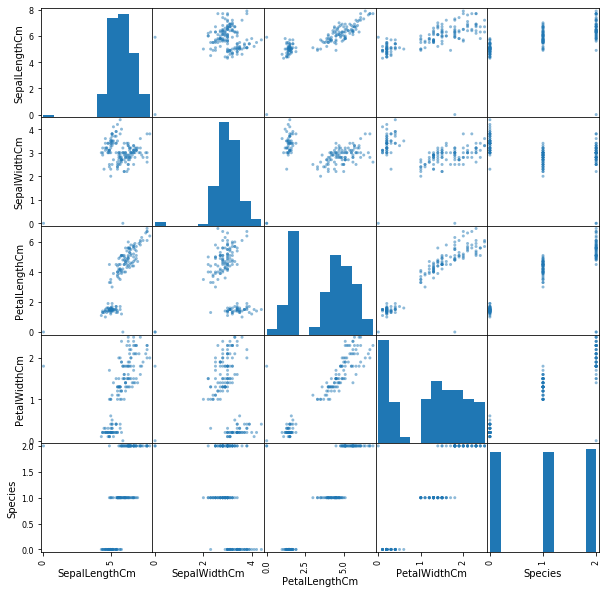

In [253]:
#Plotting Scatter Matrix
pd.plotting.scatter_matrix(iris, figsize=(10,10))
plt.show()

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [160]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [152]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [153]:
iris['Species'] = iris['Species'].astype('category')

In [155]:
iris.dtypes

SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [156]:
iris.groupby(['Species']).count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
0,50,50,50,50
1,50,50,50,50
2,52,52,52,52


In [145]:
iris = iris.drop(labels = 'Id', axis = 1)

In [146]:
iris.shape

(152, 5)

In [149]:
iris_features = iris.drop(labels='Species', axis=1)

In [151]:
iris_features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [157]:
iris_labels = iris['Species']

In [158]:
iris_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: category
Categories (3, int64): [0, 1, 2]

In [161]:
iris_features_Z = iris_features.apply(zscore)

In [163]:
iris_features_Z.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.745334,0.879763,-1.283850,-1.303084
1,-0.956697,-0.025000,-1.283850,-1.303084
2,-1.168060,0.336905,-1.339447,-1.303084
3,-1.273742,0.155952,-1.228253,-1.303084
4,-0.851015,1.060715,-1.283850,-1.303084


In [215]:
#X = np.array(iris_features_Z)
X = np.array(iris_features)

In [216]:
X.shape

(152, 4)

In [217]:
y = np.array(iris_labels)

In [218]:
y.shape

(152,)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [ ]:
#As the dataset is very small in size, it is learning quickly and so the Accuracy score is 1.0 fppr most of the K values

In [226]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns

In [227]:
for i in (3,5,9):
    print('\nk : ',i)
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance')
    NNH.fit(X_train, y_train)
    y_predict = NNH.predict(X_test)
    print('Training set Score : ',NNH.score(X_train, y_train))
    print('Test set Score : ',NNH.score(X_test, y_test))
    print('Accuracy Score of Test dataset for k = ', i , 'is', metrics.accuracy_score(y_test, y_predict))



k :  3
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  3 is 1.0

k :  5
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  5 is 1.0

k :  9
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  9 is 1.0


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Misclassification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [254]:
#As the dataset is very small in size, it is learning quickly and so the Accuracy score is 1.0 for most of the K values
# and so the MSE valu is 0 for most of the K values

In [230]:
for i in range(1,20,2):
    print('\nk : ',i)
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance')
    NNH.fit(X_train, y_train)
    y_predict = NNH.predict(X_test)
    print('Training set Score : ',NNH.score(X_train, y_train))
    print('Test set Score : ',NNH.score(X_test, y_test))
    print('Accuracy Score of Test dataset for k = ', i , 'is', metrics.accuracy_score(y_test, y_predict))
    print('MisCalculation Error MSE = ', 1-metrics.accuracy_score(y_test, y_predict))


k :  1
Training set Score :  1.0
Test set Score :  0.967741935483871
Accuracy Score of Test dataset for k =  1 is 0.967741935483871
MisCalculation Error MSE =  0.032258064516129004

k :  3
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  3 is 1.0
MisCalculation Error MSE =  0.0

k :  5
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  5 is 1.0
MisCalculation Error MSE =  0.0

k :  7
Training set Score :  1.0
Test set Score :  0.967741935483871
Accuracy Score of Test dataset for k =  7 is 0.967741935483871
MisCalculation Error MSE =  0.032258064516129004

k :  9
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  9 is 1.0
MisCalculation Error MSE =  0.0

k :  11
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test dataset for k =  11 is 1.0
MisCalculation Error MSE =  0.0

k :  13
Training set Score :  1.0
Test set Score :  1.0
Accuracy Score of Test datase

## Plot accuracy

### Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

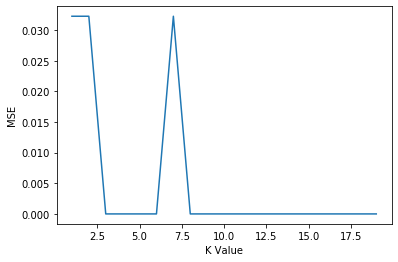

In [229]:
K_value = list()
MSE = list()
for i in range(1,20):
    #print('\nk : ',i)
    K_value.append(i)
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance')
    NNH.fit(X_train, y_train)
    y_predict = NNH.predict(X_test)
    mse_val = 1 - metrics.accuracy_score(y_test, y_predict)
    MSE.append(mse_val)
plt.plot(K_value, MSE)
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.show()